In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

## Results obtained using selected features 
| Method          | Accuracy (%) | Precision (%) | Recall (%) | F1-Score (%) |
|-----------------:|:----------:|:----------:|:----------:|:----------:|
| Stacked Ensemble| 85.85    | 87.47     | 84.75  | 85.29    |
| Concatenation Ensemble| 95.31 | 96.07     | 94.78  | 95.20    |
| Confidence Averaging   | 97.72 | 97.96     | 97.50  | 97.69    |
| VGG16-SA        | 98.72    | 98.79     | 98.63  | 98.70    |
| VGG16-TPE       | 99.15    | 99.17     | 99.11  | 99.14    |
| VGG16-RS        | 99.43    | 99.43     | 99.43  | 99.43    |
| ME-IDS          | 99.72    | 99.74     | 99.68  | 99.71    |

In [6]:
acc1 = [99.72, 99.43, 99.15, 98.72, 97.72, 95.31, 85.85]
acc2 = acc1[1:]
acc_differences = [round(acc1[0] - acc, 2) for acc in acc2]
print('Accuracy Differences: {}'.format(acc_differences))

precision1 = [99.74, 99.43, 99.17, 98.79, 97.96, 96.07, 87.47]
precision2 = precision1[1:]
precision_differences = [round(precision1[0] - precision, 2) for precision in precision2]
print('Precision Differences: {}'.format(precision_differences))

recall1 = [99.68, 99.43, 99.11, 98.63, 97.50, 94.78, 84.75]
recall2 = recall1[1:]
recall_differences = [round(recall1[0] - recall, 2) for recall in recall2]
print('Recall Differences: {}'.format(recall_differences))

f1_1 = [99.71, 99.43, 99.14, 98.70, 97.69, 95.20, 85.29]
f1_2 = f1_1[1:]
f1_differences = [round(f1_1[0] - f1, 2) for f1 in f1_2]
print('F1-Score Differences: {}'.format(f1_differences))

Accuracy Differences: [0.29, 0.57, 1.0, 2.0, 4.41, 13.87]
Precision Differences: [0.31, 0.57, 0.95, 1.78, 3.67, 12.27]
Recall Differences: [0.25, 0.57, 1.05, 2.18, 4.9, 14.93]
F1-Score Differences: [0.28, 0.57, 1.01, 2.02, 4.51, 14.42]


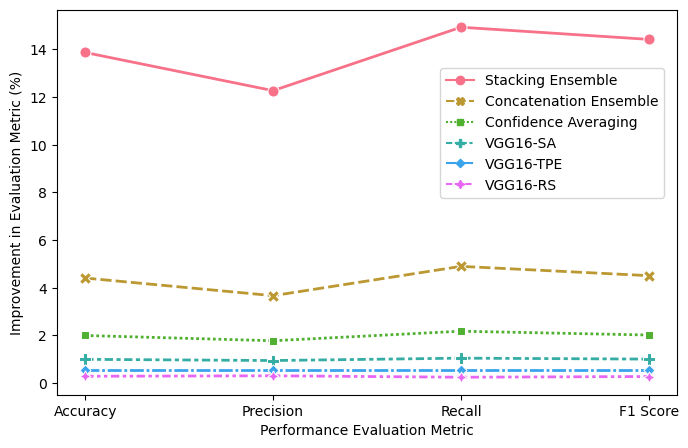

In [3]:
labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
stacking_ensemble = [acc_differences[5], precision_differences[5], recall_differences[5], f1_differences[5]]
concatenation_ensemble = [acc_differences[4], precision_differences[4], recall_differences[4], f1_differences[4]]
confidence_averaging = [acc_differences[3], precision_differences[3], recall_differences[3], f1_differences[3]]
vgg16_sa = [acc_differences[2], precision_differences[2], recall_differences[2], f1_differences[2]]
vgg16_tpe = [acc_differences[1], precision_differences[1], recall_differences[1], f1_differences[1]]
vgg16_rs = [acc_differences[0], precision_differences[0], recall_differences[0], f1_differences[0]]

import pandas as pd
data = pd.DataFrame({
    'Metrics': labels * 6,
    'Score': stacking_ensemble + concatenation_ensemble + confidence_averaging +
             vgg16_sa + vgg16_tpe + vgg16_rs,
    'Model': (['Stacking Ensemble'] * 4 + ['Concatenation Ensemble'] * 4 +
              ['Confidence Averaging'] * 4 + ['VGG16-SA'] * 4 +
              ['VGG16-TPE'] * 4 + ['VGG16-RS'] * 4)
})


plt.figure(figsize=(8, 5))
palette = sns.color_palette('husl', n_colors=len(data['Model'].unique()))
sns.lineplot(x='Metrics', y='Score', hue='Model', data=data, style='Model', markers=True, palette=palette, markersize=8, linewidth=2)

plt.xlabel('Performance Evaluation Metric')
plt.ylabel("Improvement in Evaluation Metric (%)")
plt.legend(loc='center right', bbox_to_anchor=(0.99, 0.68))
plt.savefig('Improvment with all features.pdf', bbox_inches='tight', format='pdf')
plt.show()

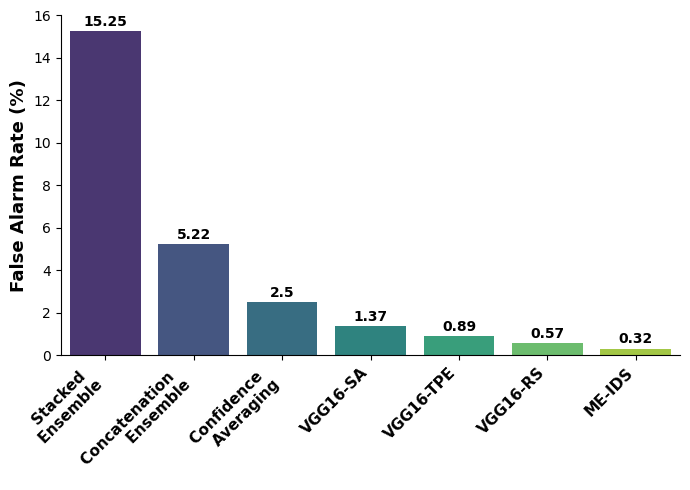

In [4]:
models = ['Stacked \n Ensemble', 'Concatenation \n Ensemble', 'Confidence \n Averaging', 'VGG16-SA', 'VGG16-TPE', 'VGG16-RS', 'ME-IDS']
values = [15.248058050991961, 5.2215189873417724, 2.5026166879272562, 1.3659928695253982, 0.8913093252216007, 0.5748536290190691, 0.31645569620253167]

plt.figure(figsize=(7, 5))
sns.barplot(x=models, y=values, palette='viridis')

for index, value in enumerate(values):
    plt.text(index, value + 0.1, str(round(value, 2)), ha='center', va='bottom', fontweight='bold')

plt.xlabel('')
plt.ylabel('False Alarm Rate (%)', fontsize=13, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize = 11,fontweight='bold')
sns.despine()

plt.tight_layout()
plt.savefig('FAR_plot.pdf', format='pdf')
plt.show()